In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [4]:
train_dataset = torchvision.datasets.MNIST(root="./data",
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root="./data",
                                          train=False,
                                          transform=transforms.ToTensor())

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                 batch_size=batch_size,
                                                 shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

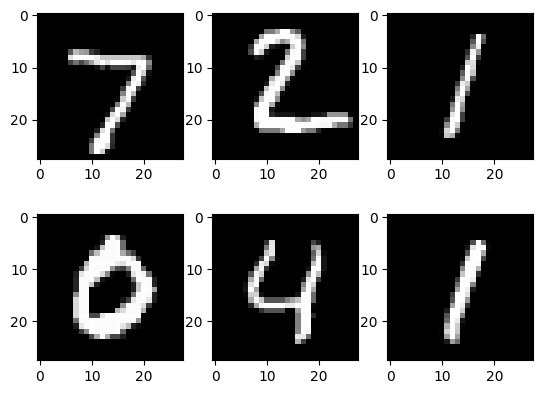

In [6]:
example = iter(test_loader)
example_data, example_targets = next(example)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap="gray")
plt.show()

In [7]:
class NN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        return self.l2(self.relu(self.l1(x)))


model = NN(input_size, hidden_size, num_classes).to(device)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1)%100 ==0:
            print(f'Epoch: [{epoch+1}/{num_epochs}], Step: [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
        

Epoch: [1/10], Step: [100/600], Loss: 0.2832
Epoch: [1/10], Step: [200/600], Loss: 0.5666
Epoch: [1/10], Step: [300/600], Loss: 0.1943
Epoch: [1/10], Step: [400/600], Loss: 0.3470
Epoch: [1/10], Step: [500/600], Loss: 0.2286
Epoch: [1/10], Step: [600/600], Loss: 0.1585
Epoch: [2/10], Step: [100/600], Loss: 0.1483
Epoch: [2/10], Step: [200/600], Loss: 0.0669
Epoch: [2/10], Step: [300/600], Loss: 0.1079
Epoch: [2/10], Step: [400/600], Loss: 0.0425
Epoch: [2/10], Step: [500/600], Loss: 0.1339
Epoch: [2/10], Step: [600/600], Loss: 0.0997
Epoch: [3/10], Step: [100/600], Loss: 0.0363
Epoch: [3/10], Step: [200/600], Loss: 0.0890
Epoch: [3/10], Step: [300/600], Loss: 0.0588
Epoch: [3/10], Step: [400/600], Loss: 0.0647
Epoch: [3/10], Step: [500/600], Loss: 0.0915
Epoch: [3/10], Step: [600/600], Loss: 0.0536
Epoch: [4/10], Step: [100/600], Loss: 0.0340
Epoch: [4/10], Step: [200/600], Loss: 0.0419
Epoch: [4/10], Step: [300/600], Loss: 0.0185
Epoch: [4/10], Step: [400/600], Loss: 0.0320
Epoch: [4/

In [10]:
with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)

        predicted = torch.max(outputs,1)
        n_correct += (predicted[1] == labels).sum().item()

    acc = n_correct / n_samples
    print(f"Accuracy on {n_samples} test images: {100*acc}%")

Accuracy on 10000 test images: 97.81%


In [11]:
torch.save(model.state_dict(), "model.pth")